
# Analyzing Employee Exit Surveys

We'll be taking a look at, and analyzing, employee exits surveys from two educational institutions:
* Department of Education, Training and Employment (DETE) 
* Technical and Further Education (TAFE)

We'll be working with two datasets (DETE, TAFE). The goal will be to clean, verify, combine, and analyze data that will help us answer the main questions.  

## The Main Questions
* Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
* Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [2]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

In [3]:
dete_survey.head(10)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,D,D,NaN,Female,41-45,NaN,NaN,NaN,NaN,NaN
6,7,Age Retirement,05/2012,1972.0,2007.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Part-time,...,D,D,SD,Female,56-60,NaN,NaN,NaN,NaN,NaN
7,8,Age Retirement,05/2012,1988.0,1990.0,Teacher Aide,NaN,North Coast,NaN,Permanent Part-time,...,SA,NaN,SA,Female,61 or older,NaN,NaN,NaN,NaN,NaN
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,A,D,N,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,SD,SD,SD,Female,46-50,NaN,NaN,NaN,NaN,NaN


In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
tafe_survey.head(10)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,NaN,NaN,NaN,NaN,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Yes,Yes,Yes,Yes,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,No,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4
8,6.341579e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2009.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,36 40,Temporary Full-time,Tutor,3-4,3-4
9,6.341588e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,Career Move - Public Sector,-,-,-,-,...,Yes,Yes,Yes,Yes,Female,21 25,Permanent Full-time,Administration (AO),1-2,1-2



## Initial Observations

### DETE Survey
* The DETE survey has a good handful of `bool` questions that should be easier to work with. Some of them might integrate well with the TAFE survey.  
* All our dates will have to be standardized across both datasets.  
* It seems like some of the "reason" columns could be combined.
* There are a lot of string objects that can become simple boolean answers.

### TAFE Survey
* This is a mess. The `Contributing Factors` can probably be merged.  
* The Institute Views could also be merged I bet. As well as Work Unit Views, Instruction Info, and Workplace. These are all basically boolean questions.  
* Age needs to be an int.  
* Length of service could potentially be categorized as short/long tenure.  

### DQ
* The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.  
* Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis.  
* Each dataframe contains many of the same columns, but the column names are different.  
*  There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.


## Cleaning

### Column Drops
DQ says to drop all these columns. I felt like they could be merged, or at least taken into account on some level. Columns like Professional Development, Opportunities for promotion, Staff morale, Workplace issue, and/or Physical environment ALL seem like very relevant reasons to move on from a job. 

However, the DETE data for these columns appear to be specific abbreviations. I'm having a hard time tracking down what those abbreviations are code for. So I guess that's why we're dropping them. 

The TAFE dropped columns are a whole bunch of agree/disagree questions. These could have a value of 1-5 if we thought the questions would be helpful. But maybe it's just too much to deal with for a beginner? Some of the other columns are straight up Y/N and some are just bools. I'm not really sure. At least it's a lot easier to look at.  

In [6]:
# Drop DQ recommended columns.
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

# Check that columns were dropped.
dete_survey_updated.info()
tafe_survey_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

### Column Renaming
* I am renaming some of these columns to more easily identify similarities between questions.  
* Adding `_` to make things a little more Pythonic.  
* Setting to lowercase for consistency.  

In [7]:
# Clean columns for clarity and ease of use.
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.replace('/', '_').str.strip().str.lower()

# Rename tafe columns to match updated dete columns.
tafe_rename = {'Record ID': 'id',
               'Institute': 'institute_specific',
               'CESSATION YEAR': 'cease_date',
               'Reason for ceasing employment': 'separationtype',
               'Gender. What is your Gender?': 'gender',
               'CurrentAge. Current Age': 'age',
               'Employment Type. Employment Type': 'employment_status',
               'Classification. Classification': 'position',
               'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
               'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}
tafe_survey_updated = tafe_survey_updated.rename(columns=tafe_rename)

# Check that columns were renamed.
print(dete_survey_updated.columns)
print(tafe_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity_family', 'relocation', 'study_travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')
Index(['id', 'institute_specific', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-


### Separation Type

One of the questions we are trying to answer revolves around the reasons for resignation. Let's isolate resignations only.  
* DETE has three different types of resignation answers (Resignation-Other reasons, Resignation-Other employer, Resignation-Move overseas/interstate). We'll merge those all into one.  
* TAFE has just a simple "Resignation" response.  

**We'll go ahead and create separate dataframes for employees that have resigned.**

In [8]:
# Check reasons for separation.
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [33]:
# Isolate the word 'resignation' from the separationtype column and create new dataframe.
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains("Resignation")].copy()
dete_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 3 to 821
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   311 non-null    int64  
 1   separationtype                       311 non-null    object 
 2   cease_date                           300 non-null    object 
 3   dete_start_date                      283 non-null    float64
 4   role_start_date                      271 non-null    float64
 5   position                             308 non-null    object 
 6   classification                       161 non-null    object 
 7   region                               265 non-null    object 
 8   business_unit                        32 non-null     object 
 9   employment_status                    307 non-null    object 
 10  career_move_to_public_sector         311 non-null    bool   
 11  career_move_to_private_sector   

In [34]:
# Check unique values.
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [35]:
# Isolate 'resignation' from separationtype columns and create dataframe.
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == "Resignation"].copy()
tafe_resignations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 3 to 701
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   id                                                   340 non-null    float64
 1   institute_specific                                   340 non-null    object 
 2   WorkArea                                             340 non-null    object 
 3   cease_date                                           335 non-null    float64
 4   separationtype                                       340 non-null    object 
 5   Contributing Factors. Career Move - Public Sector    332 non-null    object 
 6   Contributing Factors. Career Move - Private Sector   332 non-null    object 
 7   Contributing Factors. Career Move - Self-employment  332 non-null    object 
 8   Contributing Factors. Ill Health                     332 non-null    o


## Verifying Data

### Years of Service

#### dete_resignations
* Let's extract the year for `cease_date` so that we have consistency.  
* We'll also convert those values to `float` since all the start_date data is in year-only float format.  


In [36]:
# Check unique values.
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: cease_date, dtype: int64


In [13]:
# Extract all string instances of years from 'cease_date' and convert to float.
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r"([1-2][0-9]{3})").astype(float)
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [38]:
# Extract all start dates and check unique values.
dete_resignations['dete_start_date'].value_counts().sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

<AxesSubplot:>

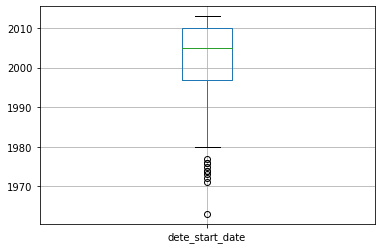

In [15]:
dete_resignations.boxplot(column='dete_start_date')


#### tafe_resignations  

* The tafe cease dates appear to already be in `float` format.  
* Instead of a start date we have `institue_service` that approximates the years of service.  

In [16]:
tafe_resignations['cease_date'].value_counts().sort_index()

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
Name: cease_date, dtype: int64

<AxesSubplot:>

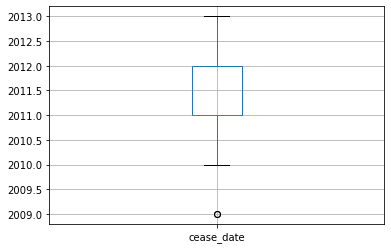

In [17]:
tafe_resignations.boxplot(column='cease_date')

In [18]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64


#### Start and Cease dates

* We'll use the TAFE years of service to approximate long and short term employees.  
* Since TAFE has start and cease dates we'll isolate rows where we can actually extract a value for years of service.  
* From what I can tell there will only be 273 rows that we can actually use (as seen below).    
* Vectorized operations will only work on non-null values so our new column will have NaN value for any rows that do not contain both a start and cease year.  

In [19]:
# Indentify which rows contain values for both a start and cease date.
dete_resig_complete = dete_resignations[['dete_start_date', 'cease_date']].notnull()
dete_resig_complete.value_counts()

dete_start_date  cease_date
True             True          273
False            True           27
True             False          10
False            False           1
dtype: int64

In [20]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service'].describe()

count    273.000000
mean      10.457875
std        9.931709
min        0.000000
25%        3.000000
50%        7.000000
75%       16.000000
max       49.000000
Name: institute_service, dtype: float64

In [21]:
dete_resignations['institute_service'].head()

3      7.0
5     18.0
8      3.0
9     15.0
11     3.0
Name: institute_service, dtype: float64


### Dissatisfied or Not

We're going to create a new column based on the contributing factors for resignation. 

TAFE has just two options and both use the term "dissatisfaction"
* `Contributing Factors. Dissatisfaction`
* `Contributing Factors. Job Dissatisfaction`  

DETE has a large handful that could fall under the category of "Dissatisfied".
* `job_dissatisfaction`
* `dissatisfaction_with_the_department`
* `physical_work_environment`
* `lack_of_recognition`
* `lack_of_job_security`
* `work_location`
* `employment_conditions`
* `work_life_balance`
* `workload`

Dete doesn't appear to have any NaN values which is really helpful.  

In [22]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
def update_vals(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True
    
    
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals).any(axis=1, skipna=True)
tafe_resignations_up = tafe_resignations.copy()

tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    249
True      91
Name: dissatisfied, dtype: int64

In [25]:
dis_map = [
    'job_dissatisfaction', 
    'dissatisfaction_with_the_department', 
    'physical_work_environment', 
    'lack_of_recognition', 
    'lack_of_job_security', 
    'work_location', 
    'employment_conditions',
    'work_life_balance',
    'workload'
]

dete_resignations['dissatisfied'] = dete_resignations[dis_map].any(axis=1, skipna=False)
dete_resignations_up = dete_resignations.copy()

dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64


## Merging Dataframes

* Let's start by adding a new column named `institute` so that we can keep track of both datasets.  
* We'll concatenate along the `rows` axis which will easily combine all the `columns` in common.  
* Let's also drop all columns with less than 500 non null values.  

In [26]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)

combined_updated = combined.dropna(axis=1, thresh=500).copy()

combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 3 to 701
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 51.5+ KB



#### We're going to use four categories to sort our employees.

We have some rows that contain full strings. We're going to convert all of them to strings, extract the first year, then return them as a `float` so we can sort them into the following four categories:   

* New: Less than 3 years at a company
* Experienced: 3-6 years at a company
* Established: 7-10 years at a company
* Veteran: 11 or more years at a company

In [27]:
# Convert all to str, extract the first set of digits, return as float.
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str').str.extract(r"(\d+)").astype('float')

combined_updated['institute_service'].value_counts(dropna=False)

1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
2.0      14
9.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
22.0      6
14.0      6
18.0      5
16.0      5
24.0      4
23.0      4
21.0      3
19.0      3
39.0      3
32.0      3
25.0      2
28.0      2
30.0      2
26.0      2
36.0      2
29.0      1
34.0      1
27.0      1
42.0      1
35.0      1
41.0      1
49.0      1
33.0      1
38.0      1
31.0      1
Name: institute_service, dtype: int64

In [28]:
# The Sorting Hat function
def stage_sorter(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif 3 <= val <= 6:
        return 'Experienced'
    elif 7 <= val <= 10:
        return 'Established'
    elif 11 <= val:
        return 'Veteran'

    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(stage_sorter)
        
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64


## Analysis

After much cleaning and sorting we finally get to do our first little bit of analysis. The `dissatisfied` column is full of True/False and no NaN.  
The `service_cat` column has 88 `NaN` values. We'll decide what to do with them later. 88 is not an insignificant amount when we are talking about ~700 rows.  

In [29]:
# Verify unique values.
print(combined_updated['dissatisfied'].value_counts(dropna=False))

False    411
True     240
Name: dissatisfied, dtype: int64


In [30]:
# Verify unique values.
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [31]:
# Find the mean of dissatisfied employees for each category.
service_cat_dis_table = combined_updated.pivot_table(index='service_cat', values='dissatisfied')
service_cat_dis_table

,dissatisfied
service_cat,
Established,0.516129
Experienced,0.343023
New,0.295337
Veteran,0.485294


<AxesSubplot:xlabel='service_cat'>

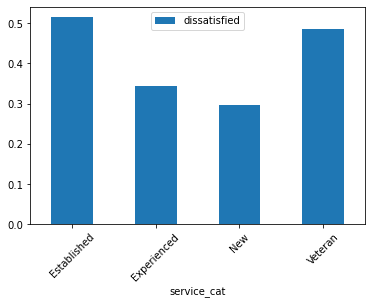

In [32]:
service_cat_dis_table.plot(kind='bar', rot=45)